In [1]:
import tensorflow as tf
%load_ext tensorboard
import datetime, os

In [2]:
mnist = tf.keras.datasets.fashion_mnist

(x_train_1, y_train), (x_test_1, y_test) = mnist.load_data()
x_train_1, x_test_1 = x_train_1 / 255.0, x_test_1 / 255.0

x_train = x_train_1.reshape(60000,28,28,1)
x_test = x_test_1.reshape(10000,28,28,1)


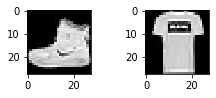

In [3]:
from matplotlib import pyplot
for i in range(2):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train_1[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, Reshape
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

model = Sequential()
model.add(Conv2D(kernel_initializer=initializers.GlorotNormal(seed=12),  
                 bias_initializer=initializers.GlorotUniform(seed=12),
    filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(padding='same'))
model.add(Conv2D(kernel_initializer=initializers.he_normal(seed=12),  
                 bias_initializer=initializers.he_uniform(seed=12), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5),
    filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu',
                     kernel_initializer=initializers.lecun_normal(seed=12),  
                     bias_initializer=initializers.lecun_uniform(seed=12)))
model.add(Dense(84, activation='relu',
                    kernel_initializer=initializers.RandomNormal(seed=12),  
                    bias_initializer=initializers.RandomUniform(seed=12), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l1(1e-5)))
model.add(Dense(10, activation='linear', kernel_initializer=initializers.he_normal(seed=12),  
                 bias_initializer=initializers.he_uniform(seed=12),kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [5]:
model.fit(x_train, y_train, batch_size=1000, epochs=2)

model.evaluate(x_test,  y_test, batch_size=1000, verbose=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 25s 410us/sample - loss: 0.9922 - accuracy: 0.6633
Epoch 2/2
60000/60000 [==============================] - 23s 388us/sample - loss: 0.5209 - accuracy: 0.8260
10000/1 - 1s - loss: 0.4783 - accuracy: 0.8379


[0.48472918570041656, 0.8379]

On the next step, let's export the model to json configuration file and weights to the hdf5 file to be parsed on the Kotlin DL side.

In [7]:
model.save_weights("C:\\zaleslaw\\home\\models\\tests\\regularizers\\mnist_weights_only.h5")

In [8]:
# serialize model to JSON
model_json = model.to_json()
with open("C:\\zaleslaw\\home\\models\\tests\\regularizers\\modelConfig.json", "w") as json_file:
    json_file.write(model_json)
